# Part I - (Dataset Exploration Title)
## by (Sang Nguyen Trong)

## Table of Contents
- Introduction
- Preliminary Wrangling
- Univariate Exploration
- Bivariate Exploration
- Multivariate Exploration
- Conclusion

## Introduction


> Loan amount, borrower rate (or rate of interest), current loan status, borrower income, and 81 additional characteristics are among the 113,937 loans in the Prosper loan dataset.

The first peer-to-peer lending platform in the US, Prosper, was established in 2005. Since then, Prosper has helped more than 770,000 borrowers access more than 12 billion USD in loans. People can make profitable and advantageous social investments in one another through Prosper.For a fixed-rate, fixed-term loan between USD 2,000 and USD 40,000, borrowers submit an online application. Investments in loans provide both people and organizations the possibility. Prosper handles all loan servicing on behalf of the matched investors and borrowers.(origin: https://about.prosper.com)





## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

C:\Users\trong\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df_prosper_loan = pd.read_csv('prosperLoanData.csv')
print(df_prosper_loan.shape[0])
df_prosper_loan.head()

113937


ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [3]:
df_prosper_loan.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

In [4]:
df_prosper_loan.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [5]:
df_prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
df_prosper_loan.nunique()

ListingKey                     113066
ListingNumber                  113066
ListingCreationDate            113064
CreditGrade                         8
Term                                3
                                ...  
PercentFunded                     719
Recommendations                    17
InvestmentFromFriendsCount         14
InvestmentFromFriendsAmount       726
Investors                         751
Length: 81, dtype: int64

In [7]:
sum(df_prosper_loan.duplicated())

0

In [8]:
df_prosper_loan.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [9]:
df_prosper_loan.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

In [10]:
df_prosper_loan.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### What is the structure of your dataset?

> 113937 records found (loans records), 81 variables.

### What is/are the main feature(s) of interest in your dataset?

> Based on loan knowledge, the variables that effect a loan will be finished, charged off, or defaulted.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> In my opinion, Borrower Monthly Payment, Borrower Occupation, Borrower State, Borrower Employment Status, Borrower Rate, Borrower APR, Prosper Score, and Loan Amount, are the aspects that will help me.

## Univariate Exploration

> In this section, investigate distributions of individual variables. With unusual points or outliers, take a deeper look to clean things up
and prepare to look at relationships between variables.




In [11]:
df_copy = df_prosper_loan.copy()

In [12]:
primary_colour= sb.color_palette()[2]

In [13]:
#Check missing values
missing_values = df_copy.isnull().sum() 
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values

BorrowerAPR                                25
CreditScoreRangeUpper                     591
CreditScoreRangeLower                     591
PublicRecordsLast10Years                  697
CurrentDelinquencies                      697
InquiriesLast6Months                      697
TotalCreditLinespast7years                697
FirstRecordedCreditLine                   697
DelinquenciesLast7Years                   990
TotalInquiries                           1159
EmploymentStatus                         2255
Occupation                               3588
BorrowerState                            5515
AvailableBankcardCredit                  7544
TradesOpenedLast6Months                  7544
TradesNeverDelinquent (percentage)       7544
TotalTrades                              7544
CurrentCreditLines                       7604
OpenCreditLines                          7604
PublicRecordsLast12Months                7604
RevolvingCreditBalance                   7604
BankcardUtilization               

In [14]:
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

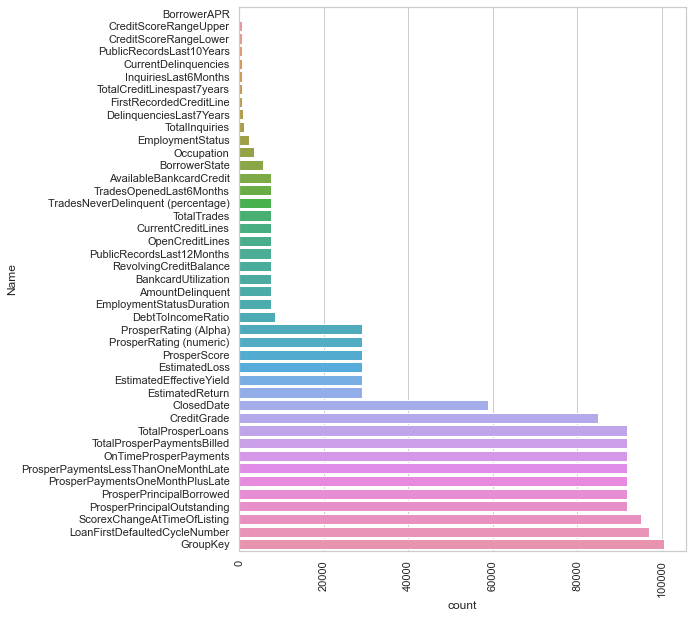

In [15]:
plt.figure(figsize=(8,10))
sb.set(style="whitegrid", color_codes=True)
sb.barplot(x = 'count', y = 'Name', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

### Observation:
> We have a lot of missing values in some columns, including TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, and LoanFirstDefaultedCyclenumber.

### 1.1 Loan Status

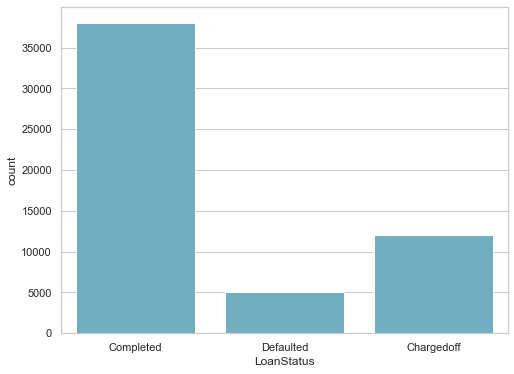

In [16]:

# Filter the DataFrame
loan_statuses = ["Defaulted", "Completed", "Chargedoff"]
df_prosper_loan_substitute = df_prosper_loan[df_prosper_loan['LoanStatus'].isin(loan_statuses)]
# Set the plot size and colors
plt.figure(figsize=(8, 6))
b_color = sb.color_palette()[9]
c_color = sb.color_palette()[2]
# Plot the count of loan statuses
sb.countplot(x='LoanStatus', data=df_prosper_loan_substitute, color=b_color)
# Display the plot
plt.show()

### 1.2. Listing Category

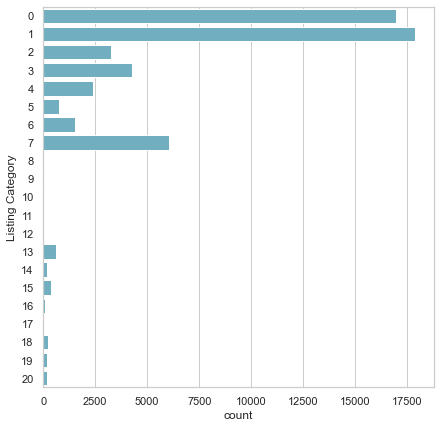

In [17]:
import seaborn as sb
import matplotlib.pyplot as plt

def plot_listing_categories(data):
    # Set the plot size
    plt.figure(figsize=(7, 7))
    # Plot the count of listing categories
    sb.countplot(y='ListingCategory (numeric)', data=data, color=sb.color_palette()[9])
    # Set the y-axis label
    plt.ylabel('Listing Category')
    # Display the plot
    plt.show()

# Call the function with your DataFrame
plot_listing_categories(df_prosper_loan_substitute)

In [18]:
df_prosper_loan_substitute['ListingCategory (numeric)'].dtype

dtype('int64')

In [19]:
# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
df_prosper_loan_substitute = df_prosper_loan_substitute.copy()
# Change the "ListingCategory (numeric)" column to categorical using the appropriate values
categories = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 
          'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 
          'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']
df_prosper_loan_substitute['ListingCategory'] = df_prosper_loan_substitute['ListingCategory (numeric)'].apply(lambda i: categories[i])
df_prosper_loan_substitute['ListingCategory'] = pd.Categorical(df_prosper_loan_substitute['ListingCategory'])
# Drop the original "ListingCategory (numeric)" column
df_prosper_loan_substitute.drop(columns=['ListingCategory (numeric)'], inplace=True)
# Check the data type of the "ListingCategory" column
print(df_prosper_loan_substitute['ListingCategory'].dtype)

category


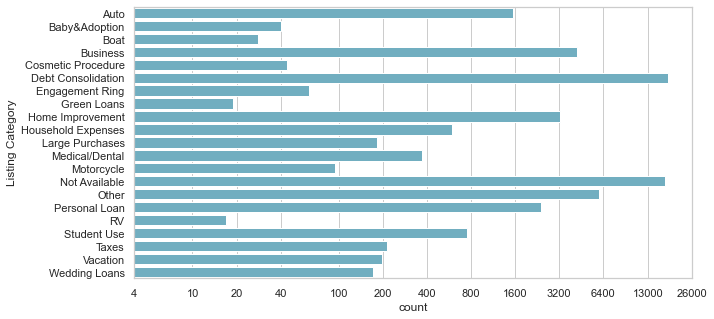

In [20]:
# Plotting with renamed category values and transformed x-values
xticks =[4, 10, 20, 40, 100, 200, 400, 800, 1600, 3200, 6400, 13000, 26000]

plt.figure(figsize=(10, 5))
sb.countplot(y='ListingCategory', data=df_prosper_loan_substitute, color=b_color)
plt.ylabel('Listing Category');
plt.xscale('log')
plt.xticks(xticks, xticks);

> Among the various listing categories, it is noteworthy that the category with the highest count is "Debt Consolidation." However, it is observed that a significant number of individuals opt for categories such as "Not available" or "other." Additionally, several listing categories exhibit multiple values with relatively low counts that may not be clearly discernible on a standard scale but are effectively represented on a logarithmic scale.

### 1.3. Plotting histogram of CreditScoreRangeLower and CreditScoreRangeUpper

### Distribution for the lowest and upper limits of credit scores


In [21]:
print(df_prosper_loan_substitute.query('CreditScoreRangeLower <= 400').CreditScoreRangeLower.value_counts())
print(df_prosper_loan_substitute.query('CreditScoreRangeUpper <= 400').CreditScoreRangeUpper.value_counts())

0.0      133
360.0      1
Name: CreditScoreRangeLower, dtype: int64
19.0     133
379.0      1
Name: CreditScoreRangeUpper, dtype: int64


### 1.4. Distribution for a credit score with a lower limit and a maximum of 400

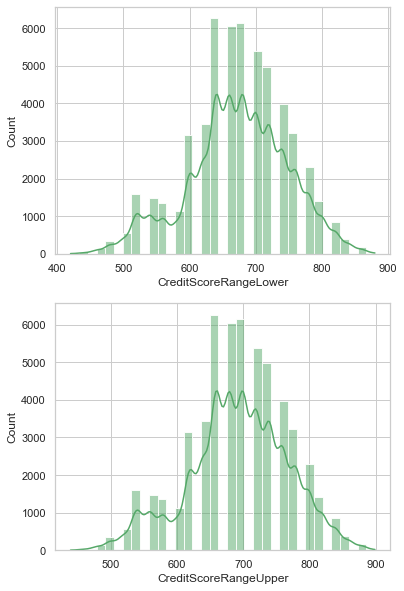

In [22]:
# Distribution for a credit score with a lower limit and a maximum of 400
fig, ax=plt.subplots(nrows=2, figsize=(6, 10))
color=sb.color_palette()[2]
sb.histplot(x='CreditScoreRangeLower', data=df_prosper_loan_substitute[df_prosper_loan_substitute.CreditScoreRangeLower>=400], ax=ax[0], bins=35, kde=True,color=color)
sb.histplot(x='CreditScoreRangeUpper', data=df_prosper_loan_substitute[df_prosper_loan_substitute.CreditScoreRangeUpper>=400], ax=ax[1], bins=35, kde=True,color=color);

### Finding from above graphs:
> Upon further investigation, it has been observed that the credit score range exhibits a left-skewed distribution with the lower and upper limits. However, after conducting additional research, it is evident that only a minority of values fall below 400 or exceed this threshold. The majority of data points are concentrated within this range. Subsequently, when the data is replotted, considering only values greater than 400, both the lower and upper credit limit distributions appear to follow a normal distribution. Given the similarity in the distribution patterns of the upper and lower credit score ranges, it would be more straightforward to calculate the average of these two columns' values.

### 1.5. Plotting Average Credit Score :

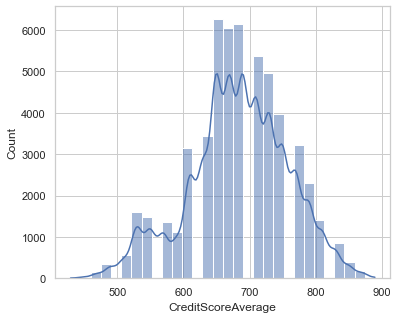

In [23]:
# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
df_prosper_loan_substitute = df_prosper_loan_substitute.copy()
# Calculate the average credit score
df_prosper_loan_substitute['CreditScoreAverage'] = (df_prosper_loan_substitute['CreditScoreRangeLower'] + df_prosper_loan_substitute['CreditScoreRangeUpper']) / 2
# Filter out credit scores less than 400
df_prosper_loan_filtered = df_prosper_loan_substitute[df_prosper_loan_substitute['CreditScoreAverage'] >= 400]
# Set the plot size
plt.figure(figsize=(6, 5))
# Plot the histogram
sb.histplot(x='CreditScoreAverage', data=df_prosper_loan_filtered, bins=30, kde=True)
# Display the plot
plt.show()

### 1.6. EmploymentStatus:

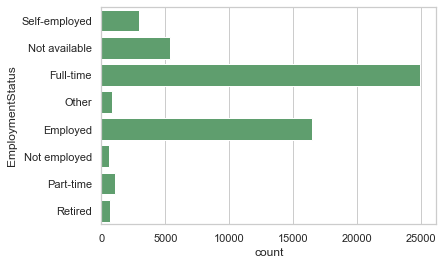

In [24]:
color=sb.color_palette()[2]
sb.countplot(y='EmploymentStatus', data =df_prosper_loan_substitute, color=color);

> The majority of those who received loans, as seen in the above bar graph, are employed.

### 1.7. Plotting the bar graph to check count of person owing the loan is having home or not:

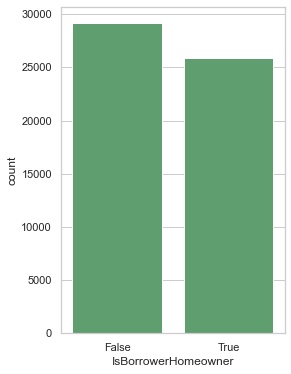

In [25]:
color=sb.color_palette()[2]
plt.figure(figsize=(4, 6))
sb.countplot(x='IsBorrowerHomeowner', data=df_prosper_loan_substitute, color=color);

> We infer from the above bar graph that the majority of those who own loans do not own their homes.

### 1.8. Check for the indicatation whether or not the Borrower was a member of a group when the listing was made.

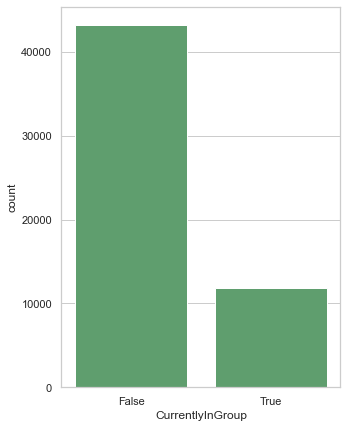

In [26]:
color=sb.color_palette()[2]
plt.figure(figsize=(5, 7))
sb.countplot(x='CurrentlyInGroup', data=df_prosper_loan_substitute, color=color);

> Most borrowers do not fit into any particular group.

### 1.9. Check whether the borrower stated that they had the necessary papers to prove their source of income.

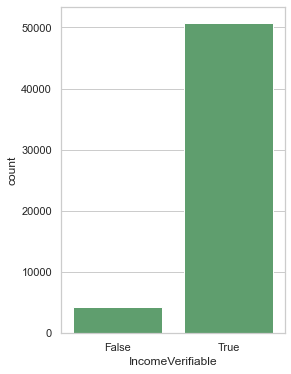

In [27]:
plt.figure(figsize=(4, 6))
sb.countplot(x='IncomeVerifiable', data=df_prosper_loan_substitute, color=c_color);

> Most borrowers with loans have sources of income that can be verified.

### 1.10. Check whether the cumulative principal payments made by the borrower before the loan was charged off. If the debt has already charged off, any recoveries are not included in this figure.

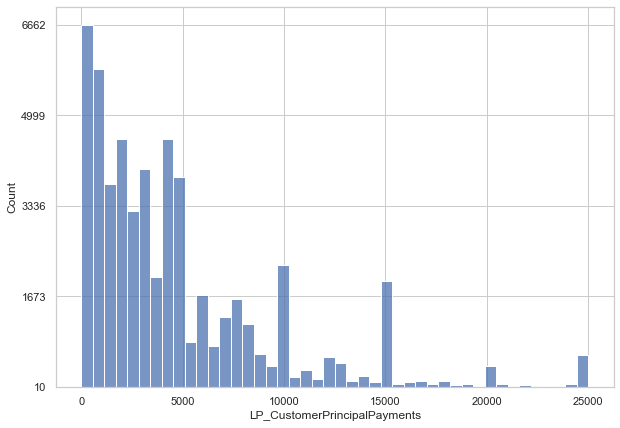

In [28]:
# Set the color palette
color = sb.color_palette()[0]
# Set the plot size
plt.figure(figsize=(10, 7))
# Define the bin edges
bins = np.linspace(0, 25000, 45)
# Plot the histogram
sb.histplot(x='LP_CustomerPrincipalPayments', data=df_prosper_loan_substitute, bins=bins, color=color)
# Get the y-axis values
counts, _ = np.histogram(df_prosper_loan_substitute['LP_CustomerPrincipalPayments'], bins=bins)
# Determine the y-axis tick locations
y_ticks = np.linspace(counts.min(), counts.max(), 5)
# Set the y-axis ticks and labels
plt.yticks(y_ticks)
plt.ylabel('Count')
# Display the plot
plt.show()

> With spikes at intervals of 5000, the number of payments made prior to being charged off appears to decrease as the sum grows.

### 1.11. Ploting how many referrals the borrower had at the time the listing was made.

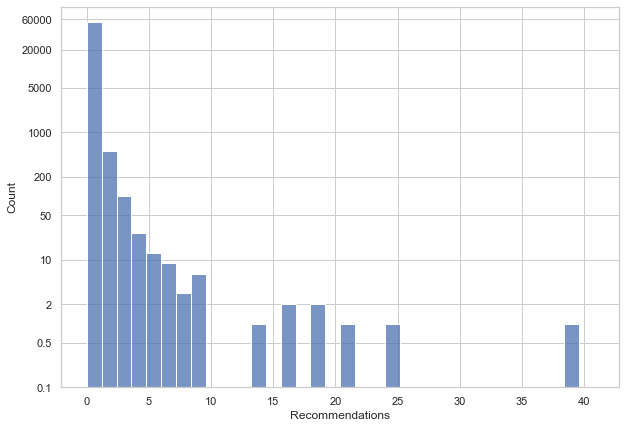

In [29]:
# Assign a color to the plot
color = sb.color_palette()[0]
# Create a figure with a width and height of 10 and 7 inches
plt.figure(figsize=(10, 7))
# Create a list of evenly spaced bins from 0 to 40, with a spacing of 1.2
bins = np.arange(0, 40+1.2, 1.2)
# Plot a histogram of the `Recommendations` column in the `df_prosper_loan_substitute` DataFrame, using the specified color and bins
sb.histplot(x='Recommendations', data=df_prosper_loan_substitute, bins=bins, color=color)
# Set the y-axis scale to logarithmic
plt.yscale('log')
# Create a list of y-ticks at the specified values
yticks = [0.1, 0.5, 2, 10, 50, 200, 1000, 5000, 20000, 60000]
# Set the y-ticks to the specified values
plt.yticks(yticks, yticks);

> The distribution of suggestions is right-skewed, with a majority of suggestions falling below the threshold of 10. This distribution was not apparent from the initial plot, but it is now obvious after choosing a lower bin size and setting the count axis to a logarithmic scale.

> The initial plot was too coarse to see the right skew, as the bins were too large. Setting the count axis to a logarithmic scale compresses the values on the y-axis, making it easier to see the distribution.

> The right skew indicates that there are a few suggestions with very high values, but most suggestions have lower values. This is likely due to the fact that some suggestions are more complex or time-consuming than others.

### 1.12. InvestmentFromFriendsCount

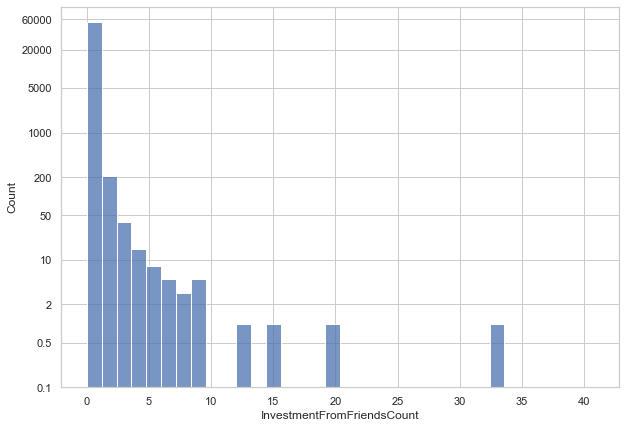

In [30]:
# Create a figure with a width and height of 10 and 7 inches
plt.figure(figsize=(10, 7))
# Create a list of evenly spaced bins from 0 to 40, with a spacing of 1.2
bins = np.arange(0, 40+1.2, 1.2)
# Set the Seaborn style to "whitegrid" and enable color coding
sb.set(style="whitegrid", color_codes=True)
# Plot a histogram of the `InvestmentFromFriendsCount` column in the `df_prosper_loan_substitute` DataFrame, using the specified bins
sb.histplot(x='InvestmentFromFriendsCount', data=df_prosper_loan_substitute, bins=bins)
# Set the y-axis scale to logarithmic
plt.yscale('log')
# Create a list of y-ticks at the specified values
yticks = [0.1, 0.5, 2, 10, 50, 200, 1000, 5000, 20000, 60000]
# Set the y-ticks to the specified values
plt.yticks(yticks, yticks);

> The distribution of InvestmentFromFriendsCount is right-skewed, with most values below 10, while Recommendations is normally distributed.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There were no out of the ordinary occurrences noted, and the variable of interest is a categorical variable. Only the values of the interest variable that are pertinent to the goals of this investigation were chosen as the only transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> During the data cleaning process, a few outlier points were identified in the lower and upper limits of the credit score range, recommendations, and investment from friends count columns. However, these values were left in the dataset because they did not have any negative effects on the quality of the data and were simply a few exceptions to the rule.

> The values for the listing category were also transformed into strings based on information taken from the dataset description. Finally, because the distribution of the credit score ranges upper and lower was comparable, they were combined into a single column called CreditScoreAverage by averaging the values from the two columns.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in the data.

### 2.1 Relationship between numerical variables:

In [31]:
rel_numeric_var= ['InvestmentFromFriendsCount', 'Recommendations', 'CreditScoreAverage', 'LP_CustomerPrincipalPayments']
catagory_var = ['ListingCategory', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup','IncomeVerifiable', 'LoanStatus']

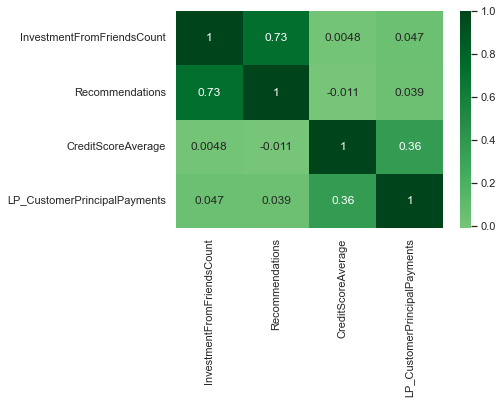

In [32]:
#Create a heatmap plot
sb.heatmap(data= df_prosper_loan_substitute[rel_numeric_var].corr(), annot=True, cmap='Greens', center=0);

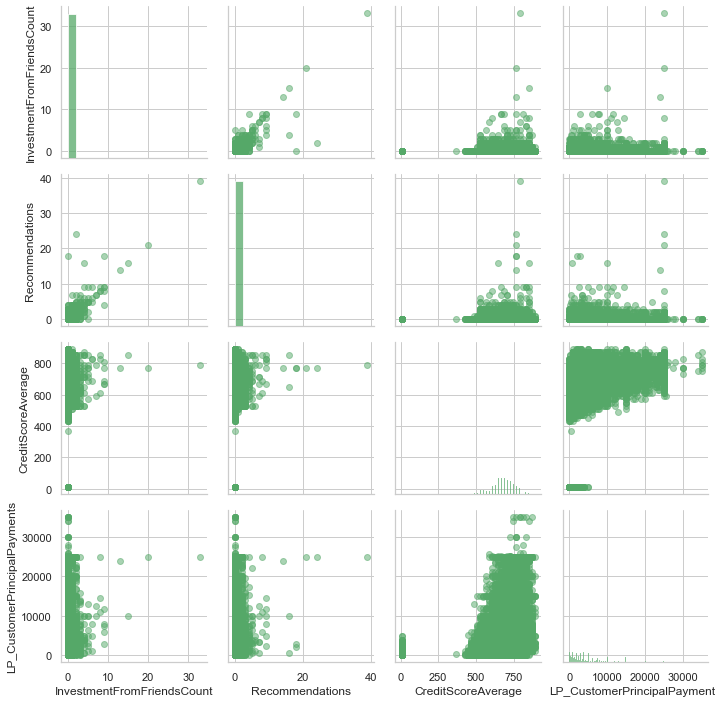

In [33]:
color=sb.color_palette()[2]
# Create a PairGrid of the rel_numeric_var variables
g = sb.PairGrid(data=df_prosper_loan_substitute, vars=rel_numeric_var)
# Plot a histogram of the diagonal variables
g.map_diag(sb.histplot, color=color)
# Plot a scatter plot of the off-diagonal variables
g.map_offdiag(plt.scatter, color=color, alpha=0.5);

> As expected, there is a strong positive correlation between the number of recommendations and the number of investments made by friends. There is also a weaker positive correlation between the average credit score and the principal payments made before being charged off. Additionally, the majority of the values for recommendations and investments from friends are below 10, with only a small percentage of values above 10.

> Next, I will investigate how the variable of interest (number of recommendations) behaves and how the distribution of the other variables changes as a result.

### 2.2 Distribution of recommendations based on loan

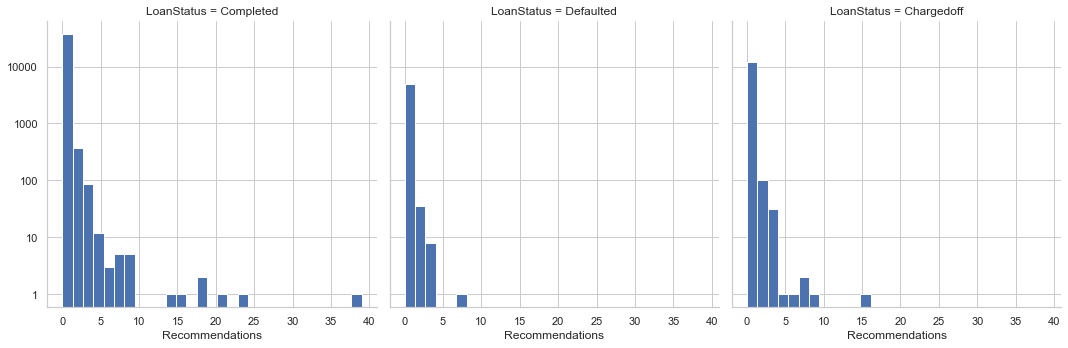

In [34]:
every_var = ['InvestmentFromFriendsCount', 'Recommendations', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
             'ListingCategory (numeric)', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
             'IncomeVerifiable', 'LoanStatus']

# Unique LoanStatus values
every_var = ['InvestmentFromFriendsCount', 'Recommendations', 'CreditScoreRangeLower', 'CreditScoreRangeUpper','ListingCategory (numeric)', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup','IncomeVerifiable', 'LoanStatus']
request = df_prosper_loan_substitute.LoanStatus.unique()
# Define bins for histograms
bins = np.linspace(0, df_prosper_loan_substitute['Recommendations'].max(), 30)
# Set y-axis tick locations and labels
yticks = [1, 10, 100, 1000, 10000]
yticklabels = ['1', '10', '100', '1k', '10k']
# Create FacetGrid
g = sb.FacetGrid(data=df_prosper_loan_substitute, col='LoanStatus', col_wrap=3, height=5)
# Map histograms to each LoanStatus category
g.map(plt.hist, 'Recommendations', bins=bins)
# Set y-axis scale and labels
g.set(yscale='log', yticks=yticks, yticklabels=yticks)
# Adjust spacing between subplots
g.tight_layout()
# Display the plot
plt.show()

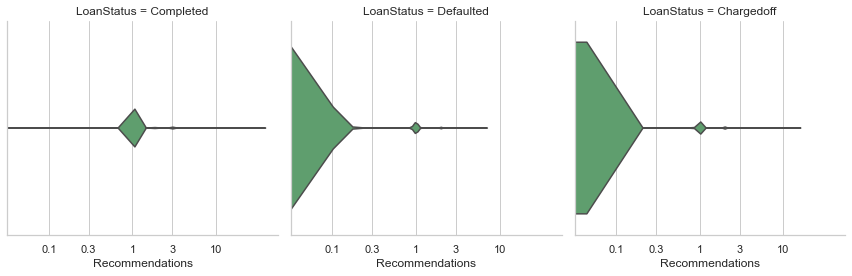

In [35]:
# Create a FacetGrid
g = sb.FacetGrid(data=df_prosper_loan_substitute, col='LoanStatus', height=4)
# Map violin plots to each LoanStatus category
g.map(sb.violinplot, 'Recommendations', order=request,color=c_color)
# Set x-axis scale and labels
xticks = [0.1, 0.3, 1, 3, 10]
g.set(xscale='log', xticks=xticks, xticklabels=xticks)
# Display the plot
plt.show()

### 2.3 Friends' contributions are distributed according to loan

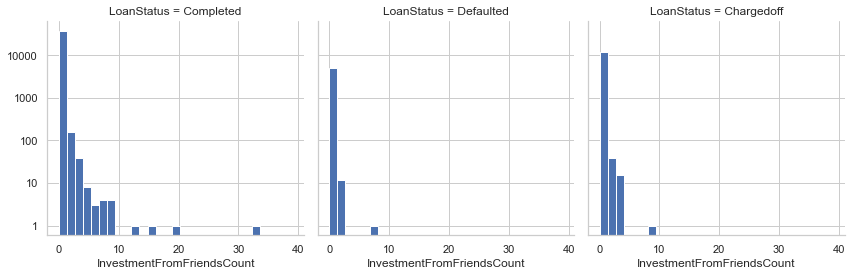

In [36]:
g=sb.FacetGrid(data=df_prosper_loan_substitute, col='LoanStatus', height=4)
g.map(plt.hist, 'InvestmentFromFriendsCount', bins=bins)
g.set(yscale='log', yticks=yticks, yticklabels=yticks);

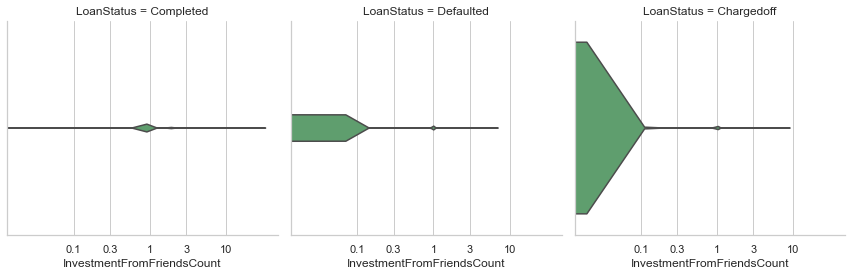

In [37]:
# Create a FacetGrid
g = sb.FacetGrid(data=df_prosper_loan_substitute, col='LoanStatus', height=4)
# Define bins for histograms
bins = np.linspace(0, df_prosper_loan_substitute['InvestmentFromFriendsCount'].max(), 30)
# Create violin plots to each LoanStatus category
g.map(sb.violinplot, 'InvestmentFromFriendsCount', order=request,color=c_color)
# Set x-axis scale and labels
xticks = [0.1, 0.3, 1, 3, 10]
g.set(xscale='log', xticks=xticks, xticklabels=xticks);
# Display the plot
plt.show()

> Based on the histogram plot, it can be observed that the majority of borrowers have fewer than 10 recommendations. Additionally, it is evident that investments from friends play a role in determining the outcome of a loan, whether it is completed, defaulted on, or charged off. This finding supports the earlier observation and further highlights that completed loans with investments from friends and fewer than ten recommendations are more prevalent compared to defaulted and charged-off loans.

>The violin plot provides a deeper understanding of the distribution. It reveals that while the majority of completed loans have at least 10 recommendations and investments from friends, the majority of defaulted or charged-off loans exhibit recommendations and investments from friends totaling less than 2. This insight emphasizes the potential significance of these factors in loan outcomes and underscores their contrasting distribution between completed and defaulted/charged-off loans.

### 2.4 Distribution of average credit scores by loan status:

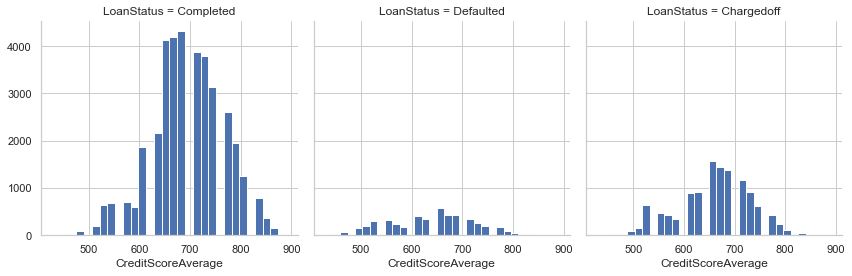

In [38]:
# Define the color for the histogram
color = sb.color_palette()[0]
# Create a filtered DataFrame based on the condition
filtered_df = df_prosper_loan_substitute[df_prosper_loan_substitute.CreditScoreAverage >= 400]
# Create a FacetGrid
g = sb.FacetGrid(data=filtered_df, col='LoanStatus', height=4)
# Map histograms to each LoanStatus category
g.map(plt.hist, 'CreditScoreAverage', bins=30, color=color)
# Display the plot
plt.show()

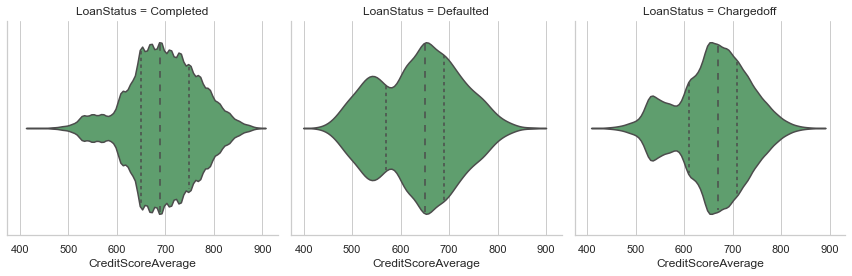

In [39]:
# Create a FacetGrid
g=sb.FacetGrid(data=df_prosper_loan_substitute[df_prosper_loan_substitute.CreditScoreAverage>=400], col='LoanStatus', height=4)
# Create violin plots to each LoanStatus category
g.map(sb.violinplot, 'CreditScoreAverage', inner='quartile', bins=30, order=request,color=c_color);

> The graph clearly illustrates that borrowers with average credit scores ranging from 600 to 800 were more inclined to repay their loans in full rather than default. To provide a closer look at this observation, the subsequent graphic emphasizes that the mean credit score average for completed loans is approximately 700, while for defaulted and charged-off loans, it is around 650 and 680, respectively. Moreover, the plot reveals that the majority of borrowers who successfully paid off their debts had credit scores averaging between 650 and 750. Conversely, most borrowers who defaulted or were charged off had credit scores averaging below 700. This analysis underscores the significance of credit scores in loan repayment outcomes and highlights the threshold of 700 as a critical point distinguishing successful repayments from defaults.

### 2.5 Distribution of employment status by loan status

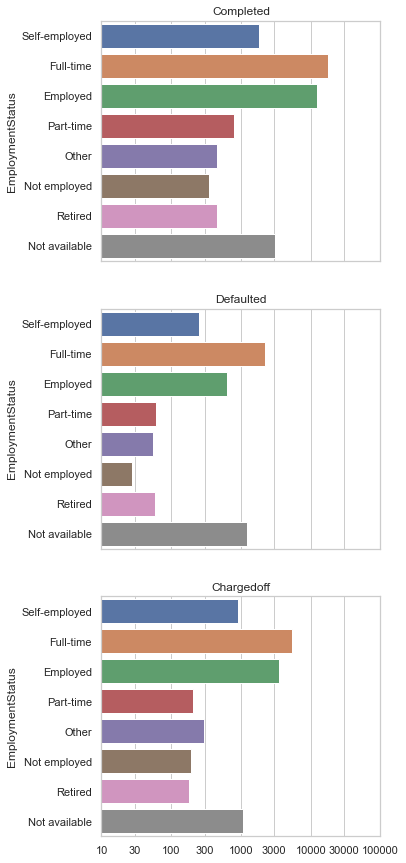

In [40]:
# Define x-axis tick values
xticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
# Define the employment status order
request = ['Self-employed', 'Full-time', 'Employed', 'Part-time', 'Other', 'Not employed', 'Retired', 'Not available']
# Create subplots with shared x-axis
fig, ax = plt.subplots(nrows=3, figsize=(5, 15), sharex=True)
# Plot for Completed loans
sb.countplot(data=df_prosper_loan_substitute.query('LoanStatus=="Completed"'), y='EmploymentStatus', ax=ax[0],  order=request)
ax[0].set_title('Completed')
ax[0].set_xlabel('')
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xticks)
# Plot for Defaulted loans
sb.countplot(data=df_prosper_loan_substitute.query('LoanStatus=="Defaulted"'), y='EmploymentStatus', ax=ax[1],  order=request)
ax[1].set_title('Defaulted')
ax[1].set_xlabel('')
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xticks)
# Plot for Chargedoff loans
sb.countplot(data=df_prosper_loan_substitute.query('LoanStatus=="Chargedoff"'), y='EmploymentStatus', ax=ax[2],  order=request)
ax[2].set_title('Chargedoff')
ax[2].set_xlabel('')
ax[2].set_xticks(xticks)
ax[2].set_xticklabels(xticks)
# Set x-axis to logarithmic scale and adjust tick labels
plt.xscale('log')
plt.xticks(xticks, xticks)
# Display the plot
plt.show()

### 2.6 Verifiable employment status and income:

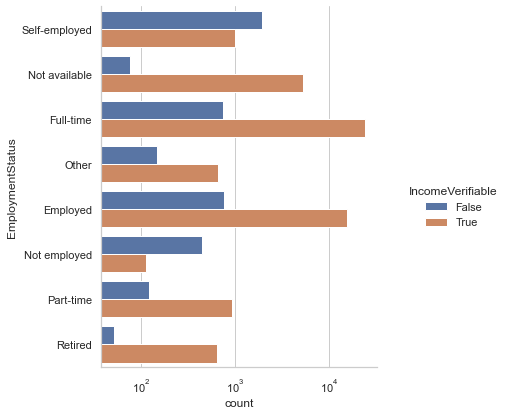

In [41]:
g = sb.catplot(data=df_prosper_loan_substitute, hue='IncomeVerifiable', y='EmploymentStatus', kind='count', orient='v')
g.set(xscale='log')
# Optionally, modify the figure size
g.fig.set_size_inches(8, 6)
# Display the plot
plt.show()

In [42]:
df_prosper_loan_substitute.groupby('EmploymentStatus')['LoanStatus'].value_counts()

EmploymentStatus  LoanStatus
Employed          Completed     12332
                  Chargedoff     3529
                  Defaulted       630
Full-time         Completed     17397
                  Chargedoff     5343
                  Defaulted      2217
Not available     Completed      3077
                  Defaulted      1204
                  Chargedoff     1065
Not employed      Completed       344
                  Chargedoff      190
                  Defaulted        27
Other             Completed       449
                  Chargedoff      295
                  Defaulted        54
Part-time         Completed       794
                  Chargedoff      202
                  Defaulted        60
Retired           Completed       459
                  Chargedoff      180
                  Defaulted        58
Self-employed     Completed      1783
                  Chargedoff      897
                  Defaulted       246
Name: LoanStatus, dtype: int64

> Indeed, based on the plot and value counts, it can be concluded that borrowers who are fully employed (Employed, Full-time, Part-Time) have a higher completion rate of their loans compared to defaulters. This suggests that borrowers who have steady employment and can prove their income are less likely to default on their loans.

>Additionally, it is observed that loans given to borrowers in other employment categories (excluding the fully employed categories) have default rates of 50% or higher. This further emphasizes the importance of steady employment in reducing the risk of loan default.

> In summary, the analysis indicates that being fully employed significantly reduces the likelihood of loan default, highlighting the importance of stable employment when assessing borrowers' creditworthiness.

### 2.7 Verifiable revenue distribution according to loan

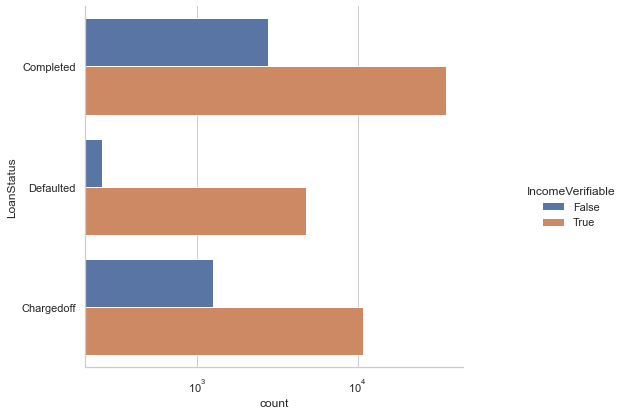

In [43]:
g=sb.catplot(data=df_prosper_loan_substitute, hue='IncomeVerifiable', y='LoanStatus', kind='count', orient='v')
g.set(xscale='log');
# Optionally, modify the figure size
g.fig.set_size_inches(10, 6)
# Display the plot
plt.show()

> The majority of borrowers who receive loans and who can provide proof of their income repay them in full, but this is also true

### 2.8 Listing the proportion of categories for each loan status

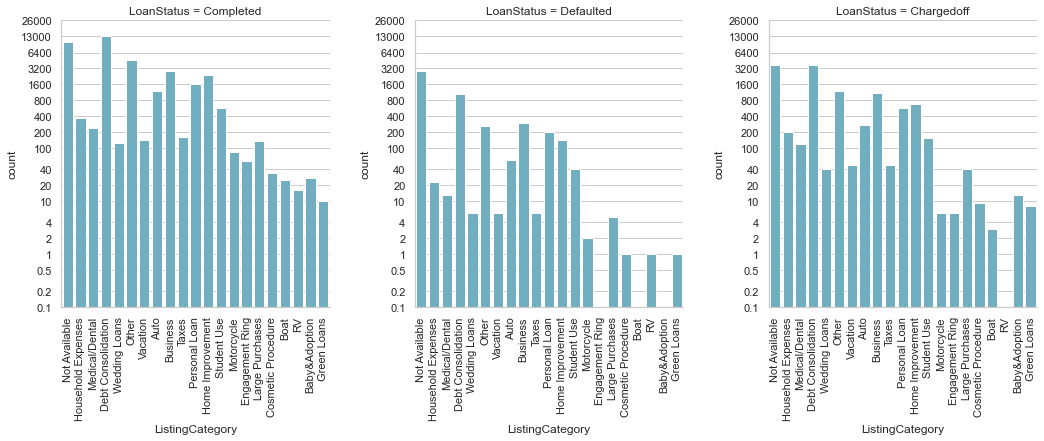

In [44]:
request = df_prosper_loan_substitute.ListingCategory.unique()
yticks =[0.1, 0.2, 0.5, 1, 2, 4, 10, 20, 40, 100, 200, 400, 800, 1600, 3200, 6400, 13000, 26000]
g=sb.FacetGrid(data=df_prosper_loan_substitute, col='LoanStatus', height=5, sharey=False)
g.map(sb.countplot, 'ListingCategory', order=request,color=b_color)
g.set(yscale='log', yticks=yticks, yticklabels=yticks)
g.set_xticklabels(rotation=90);

In [45]:
df_prosper_loan_substitute.groupby('ListingCategory')['LoanStatus'].value_counts()

ListingCategory     LoanStatus
Auto                Completed      1210
                    Chargedoff      270
                    Defaulted        59
Baby&Adoption       Completed        27
                    Chargedoff       13
Boat                Completed        25
                    Chargedoff        3
Business            Completed      2848
                    Chargedoff     1108
                    Defaulted       301
Cosmetic Procedure  Completed        34
                    Chargedoff        9
                    Defaulted         1
Debt Consolidation  Completed     13167
                    Chargedoff     3655
                    Defaulted      1045
Engagement Ring     Completed        57
                    Chargedoff        6
Green Loans         Completed        10
                    Chargedoff        8
                    Defaulted         1
Home Improvement    Completed      2434
                    Chargedoff      669
                    Defaulted       141
Household

### Findings:
- The largest number of loans that have been completed is under the category of debt consolidation, with a count of 13,167. This is followed by defaulted loans with a count of 1,045, and charged-off loans with a count of 3,655. This indicates that debt consolidation loans have the highest completion rate compared to default and charged-off rates.
- There is a significant likelihood that business loans will be charged off. This suggests that borrowers who take out loans for business purposes have a higher risk of defaulting or having their loans charged off.
- Most personal loans, including those for categories such as vacation, taxes, personal loans, home improvement, student use, engagement ring, large purchases, cosmetic procedures, boat, RV, baby and adoption, green loans, and wedding loans, have a high completion rate compared to their defaulted and charged-off rates. This implies that borrowers who take out personal loans for various purposes are more likely to repay their loans in full rather than defaulting or having them charged off.

### 2.9. In Group vs Loan Status relation

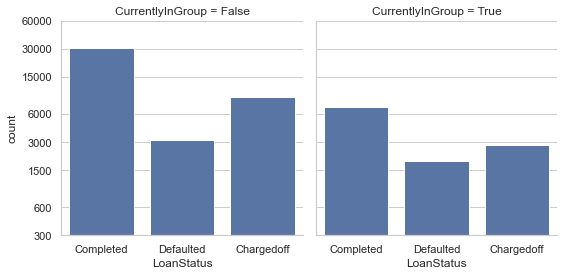

In [46]:
request = df_prosper_loan_substitute.LoanStatus.unique()
g = sb.FacetGrid(data=df_prosper_loan_substitute, col='CurrentlyInGroup', height=4)
g.map(sb.countplot, 'LoanStatus', order=request)
g.set(yscale='log')
yticks=[300, 600, 1500, 3000, 6000, 15000, 30000, 60000]
g.set(yticks=yticks, yticklabels=yticks);

>  In contrast to the (6000) finished loans for individuals who are members of a group, the majority of those who do not belong to any group successfully completed their loans (30 000).

### 2.10. Isborrowerhomeowner VS Loan Status

<Figure size 576x720 with 0 Axes>

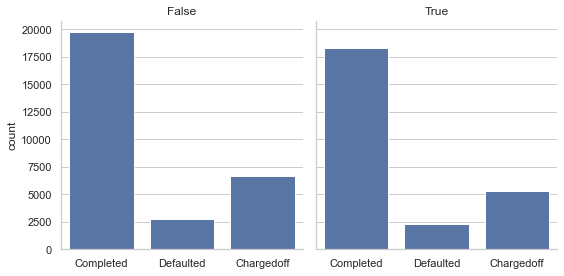

In [47]:
plt.figure(figsize=(8, 10))
sb.set(style="whitegrid", color_codes=True)
g = sb.FacetGrid(data=df_prosper_loan_substitute, col='IsBorrowerHomeowner', height=4)
g.map(sb.countplot, 'LoanStatus', order=request)
g.set_xticklabels(request)
g.set_titles('{col_name}')
g.set_xlabels('')
plt.tight_layout();

> The graph above demonstrates that a borrower's ownership status does not appear to affect whether a loan will be repaid in whole, charged off, or defaulted.

### 2.11. LP_CustomerPrincipalPayments vs LoanStatus

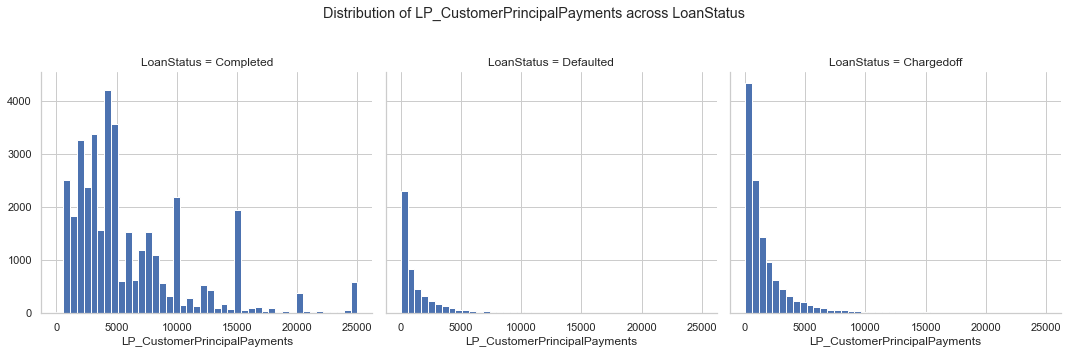

In [48]:
bins = np.linspace(0, 25000, 45)
# Create a FacetGrid with LoanStatus as the column variable
g=sb.FacetGrid(data=df_prosper_loan_substitute, col='LoanStatus', height=5)
# Map a histogram to 'LP_CustomerPrincipalPayments' for each LoanStatus category
g.map(plt.hist, 'LP_CustomerPrincipalPayments', bins=bins)
plt.suptitle('Distribution of LP_CustomerPrincipalPayments across LoanStatus')
plt.tight_layout(rect=[0, 0, 1, 0.95]);

> Most completed loans include principle payments of at least $5,000, according to the plot above.

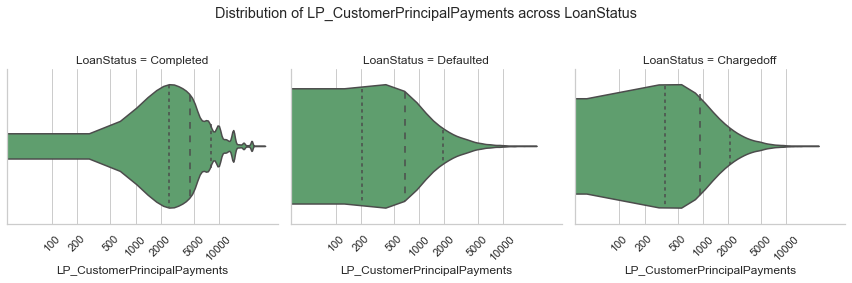

In [49]:
xticks = [100, 200, 500, 1000, 2000, 5000, 10000]
# Create a FacetGrid with LoanStatus as the column variable
g=sb.FacetGrid(data=df_prosper_loan_substitute, col='LoanStatus', height=4)
# Map a violinplot to 'LP_CustomerPrincipalPayments' for each LoanStatus category
g.map(sb.violinplot, 'LP_CustomerPrincipalPayments', bins=bins, inner='quartile', order=request,color=c_color)
# Set the x-axis scale to logarithmic and customize the x-axis ticks and labels
g.set(xscale='log', xticks=xticks, xticklabels=xticks)
g.set_xticklabels(rotation=45)
plt.suptitle('Distribution of LP_CustomerPrincipalPayments across LoanStatus')
plt.tight_layout(rect=[0, 0, 1, 0.95])

> Upon zooming in on the violin plot, we can observe the following patterns: Completed loans that were initially written off exhibit a range of principal payments between 2000 and 5000. On the other hand, the majority of charged off and defaulted loans with unpaid principal balances display principal payments predominantly falling within the 0 to 1000 range.

### 2.12. Comparison of friend investments against recommendations

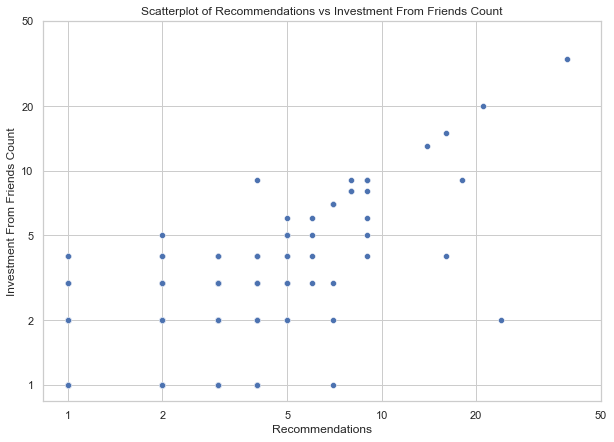

In [50]:
color = sb.color_palette()[0]
plt.figure(figsize=(10, 7))
sb.scatterplot(x='Recommendations', y='InvestmentFromFriendsCount', data=df_prosper_loan_substitute, color=color)
ticks = [1, 2, 5, 10, 20, 50]
plt.xscale('log')
plt.yscale('log')
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
# Add labels and title
plt.xlabel('Recommendations')
plt.ylabel('Investment From Friends Count')
plt.title('Scatterplot of Recommendations vs Investment From Friends Count')
plt.show()

> With a few exceptions, investment from friends rises as recommendations rise for the majority of loans in our sample. This supports the previously noted correlation of 0.73.

### 2.13. Average credit score in comparison to principal paid before being charged off

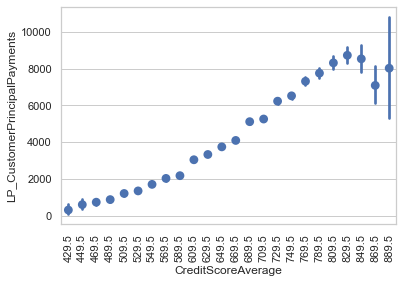

In [51]:
sb.pointplot(y='LP_CustomerPrincipalPayments', x='CreditScoreAverage',
               data=df_prosper_loan_substitute[df_prosper_loan_substitute['CreditScoreAverage']>=400],
              join=False)
plt.xticks(rotation=90);

> With an average credit score increase, the average payment amount made prior to a charge-off appears to rise.

### 2.14 Prosper Score VS Employement Status:

In [52]:
mt_counts=df_prosper_loan_substitute.groupby(['EmploymentStatus','ProsperScore']).size()
mt_counts

EmploymentStatus  ProsperScore
Employed          1.0              300
                  2.0              897
                  3.0             1055
                  4.0             1937
                  5.0             2263
                                  ... 
Self-employed     7.0               79
                  8.0               94
                  9.0               68
                  10.0              22
                  11.0               2
Length: 72, dtype: int64

In [53]:
mt_counts=mt_counts.reset_index(name='count')
mt_counts

EmploymentStatus  ProsperScore  count
0          Employed           1.0    300
1          Employed           2.0    897
2          Employed           3.0   1055
3          Employed           4.0   1937
4          Employed           5.0   2263
..              ...           ...    ...
67    Self-employed           7.0     79
68    Self-employed           8.0     94
69    Self-employed           9.0     68
70    Self-employed          10.0     22
71    Self-employed          11.0      2

[72 rows x 3 columns]

In [54]:
mt_counts = mt_counts.pivot(index = 'EmploymentStatus' , columns = 'ProsperScore' , values = 'count')
mt_counts

ProsperScore       1.0    2.0     3.0     4.0     5.0     6.0     7.0   \
EmploymentStatus                                                         
Employed          300.0  897.0  1055.0  1937.0  2263.0  2800.0  2105.0   
Full-time         144.0  128.0   213.0   344.0   553.0   690.0   759.0   
Not employed        2.0   20.0    39.0    60.0    72.0    72.0    51.0   
Other              20.0   62.0    90.0   135.0   138.0   148.0    86.0   
Part-time           3.0    6.0     5.0    13.0    26.0    20.0    31.0   
Retired            11.0   14.0     9.0    17.0    25.0    38.0    43.0   
Self-employed     133.0  168.0   155.0   225.0   207.0   177.0    79.0   

ProsperScore        8.0     9.0    10.0  11.0  
EmploymentStatus                               
Employed          2880.0  1277.0  935.0  30.0  
Full-time         1332.0  1714.0  653.0   NaN  
Not employed        36.0    20.0    3.0   NaN  
Other               81.0    30.0    8.0   NaN  
Part-time           49.0    59.0   12.0   NaN  
Retired             44.0    48.0   20.0   NaN  
Self-employed       94.0    68.0   22.0   2.0

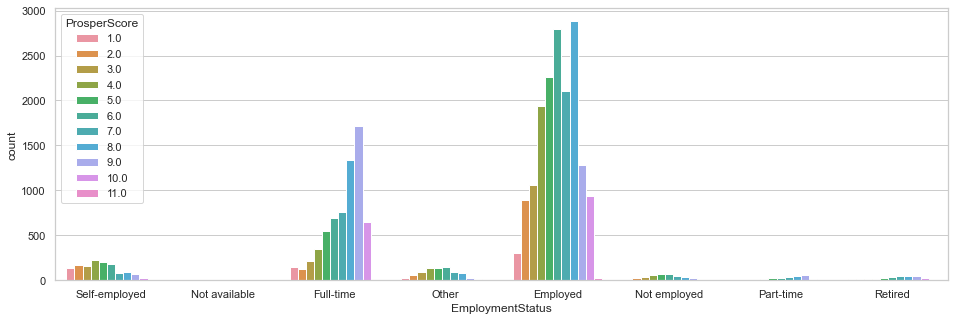

In [55]:
plt.figure(figsize = [16,5])
axis = sb.countplot(data = df_prosper_loan_substitute, x = 'EmploymentStatus' , hue = 'ProsperScore');
plt.xticks();

## Findings:

><b>Employed Borrowers receive the highest Prosper rating.<br>
><b>The number of Prosper Rated Borrowers in various Employment Statuses differs greatly.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The loan status shows the strongest correlation with several key attributes among those examined. Firstly, the count of recommendations and investments from friends plays a significant role, as loans with a lower count often result in higher default rates, while loans with at least ten recommendations and investments have a greater chance of being completed successfully. Secondly, the average credit score is crucial, with borrowers who have scores between 650 and 750 being more likely to repay their loans, whereas those with scores below 700 tend to default or have their loans charged off. Additionally, employment status is a significant factor, as individuals with full-time jobs have higher loan completion rates compared to the unemployed. Moreover, personal loans tend to perform better than corporate loans, indicating a higher likelihood of successful repayment. Lastly, the amount of principal payments made before being charged off reveals that loans with payments below 1000 are unlikely to be fully repaid, while loans with payments between 2000 and 5000 have a higher chance of being completed. These findings emphasize the importance of factors such as social connections, creditworthiness, employment stability, loan category, and timely principal payments in determining the probability of loan completion and successful repayment.
- And the least discernible connection to the ensuing characteristics:

> Verifiable income source: Given that both groups are more likely to default than neither group, there doesn't seem to be much of a difference in the completion rates between the two groups.

> Current Group Membership: There isn't much of a difference between those in groups and those who aren't. Because of how the story is written, people who are a part of a group default equally as frequently as people who are not.

> Is Borrower a Homeowner? Both homeowners and renters are more likely to default than other borrowers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


> The likelihood of a friend's investment in a loan tends to increase as the number of recommendations grows. This correlation can be attributed to the fact that friends are more likely to receive recommendations and loans from their social circle rather than from strangers.

> There is also a relationship between prior principal payments and the average credit score. It is reasonable to assume that borrowers with higher credit scores are more likely to make regular and substantial principal payments, contributing to a positive repayment history.

> Furthermore, individuals with jobs typically have dependable sources of income. This connection suggests that borrowers who are employed have a greater ability to repay their loans consistently, as they have a steady stream of income to rely on.

> These correlations highlight the importance of social networks, creditworthiness, and stable employment in the context of loan investments, principal payments, and repayment capacity.

## Multivariate Exploration


### 3.1 Employment situation, Credit score on average, and Loan status

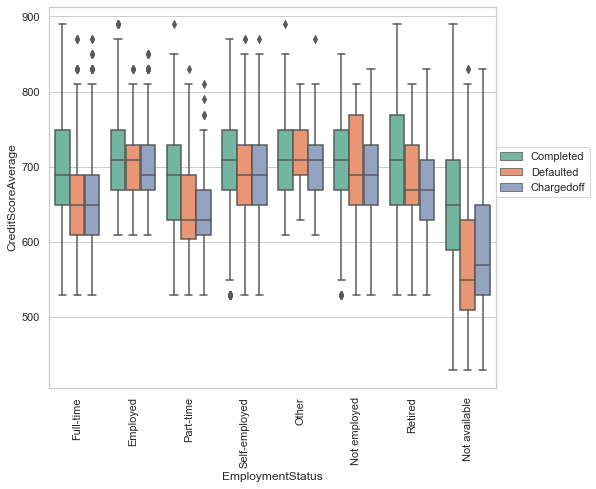

In [56]:
request = ['Full-time', 'Employed', 'Part-time', 'Self-employed', 'Other', 'Not employed', 'Retired', 'Not available']
fig, ax=plt.subplots(nrows=1, figsize=(8, 7))
sb.boxplot(data=df_prosper_loan_substitute.query('CreditScoreAverage>=400'), y='CreditScoreAverage', 
           color=c_color, order=request, x='EmploymentStatus', ax=ax, hue='LoanStatus', palette='Set2')
plt.legend(loc=(1, 0.5))
plt.xticks(rotation=90);

> The graph above further reinforces previous observations that individuals who are fully employed show a preference for repaying their debts. Additionally, it illustrates that among those who are fully employed but default on their loans, there is a lower average credit score compared to individuals who successfully repay their loans.

>Moreover, the graph reveals that individuals who select "Not available" as their work status are most likely to default on their loans. Furthermore, the majority of this group also exhibits average credit scores below 650.

>These findings highlight the strong relationship between employment status, creditworthiness, and loan repayment behavior. Fully employed individuals demonstrate a higher tendency to fulfill their financial obligations, while those who are not employed or indicate "Not available" as their work status are more prone to defaulting on their loans. Additionally, the lower average credit scores among defaulters suggest a potential correlation between creditworthiness and loan repayment outcomes.

### 3.2. Employment state, The number of investments made by friends and Loan status

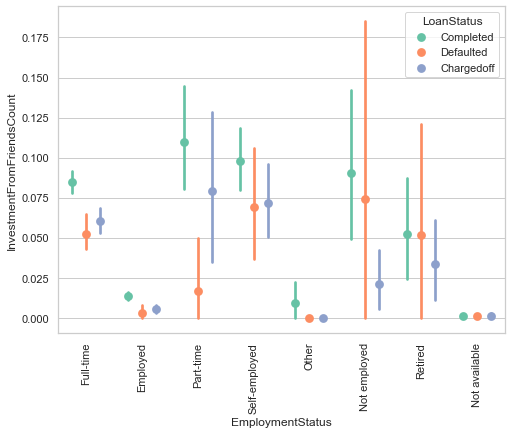

In [57]:
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
sb.pointplot(x='EmploymentStatus', y='InvestmentFromFriendsCount', data=df_prosper_loan_substitute, 
             hue='LoanStatus', ax=ax, join=False, dodge=0.5, order=request, palette='Set2')
plt.xticks(rotation=90);

> Compared to the other categories in our dataset, those who are employed full-time had a higher average investment from friends count.

### 3.3. Loan Status versus. Loan Origination Year and ListingCategory (numeric)

In [58]:
np.random.seed(2018)
sample=np.random.choice(df_copy.shape[0] , 50000 , replace=False)
df_subset = df_copy.loc[sample]
df_copy['LoanOriginationDate']= pd.to_datetime(df_copy['LoanOriginationDate'])

df_copy['Originationyear'] = df_copy['LoanOriginationDate'].dt.year
df_copy['Originationmonth'] = df_copy['LoanOriginationDate'].dt.month
df_copy['Originationday'] = df_copy['LoanOriginationDate'].dt.day

df_copy.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_NetPrincipalLoss  \
0        0.1580       0.1380  ...                  0.0   
1        0.0920       0.0820  ...                  0.0   
2        0.2750       0.2400  ...                  0.0   
3        0.0974       0.0874  ...                  0.0   
4        0.2085       0.1985  ...                  0.0   

   LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
0                              0.0            1.0                0   
1                              0.0            1.0                0   
2                              0.0            1.0                0   
3                              0.0            1.0                0   
4                              0.0            1.0                0   

  InvestmentFromFriendsCount  InvestmentFromFriendsAmount  Investors  \
0                          0                          0.0        258   
1                          0                          0.0          1   
2                          0                          0.0         41   
3                          0                          0.0        158   
4                          0                          0.0         20   

  Originationyear Originationmonth Originationday  
0            2007                9             12  
1            2014                3              3  
2            2007                1             17  
3            2012               11              1  
4            2013                9             20  

[5 rows x 84 columns]

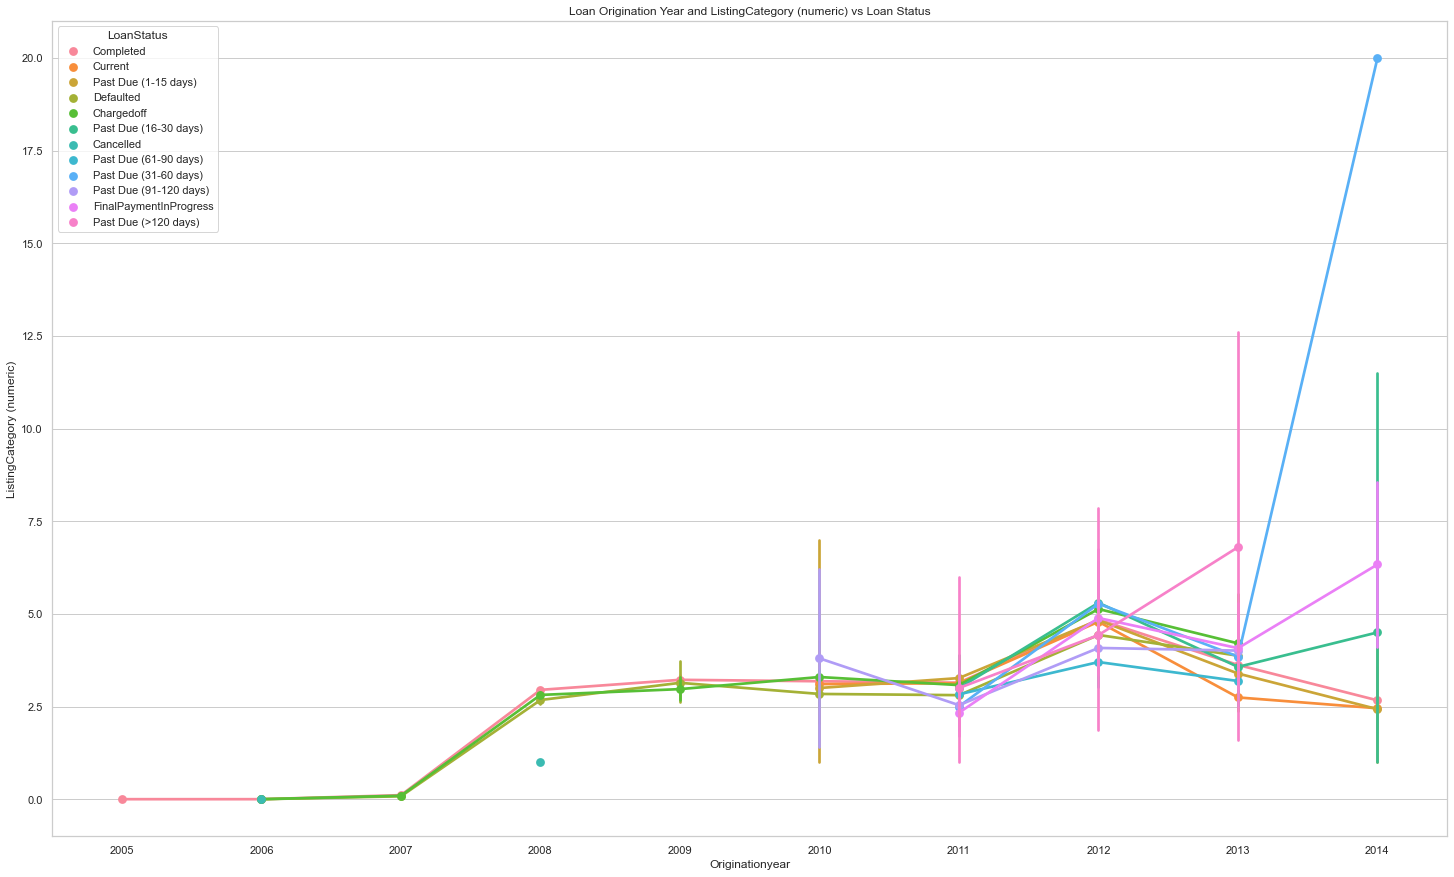

In [59]:
plt.figure(figsize = [25,15])
sb.pointplot(data = df_copy, x = 'Originationyear', 
            y = 'ListingCategory (numeric)', hue = "LoanStatus");

plt.title('Loan Origination Year and ListingCategory (numeric) vs Loan Status');

> Loan Past Duo 61-90 days are prominent in the Listing category in 2014

### 3.4. Loan status, Employment Status, and LP CustomerPrincipalPayments

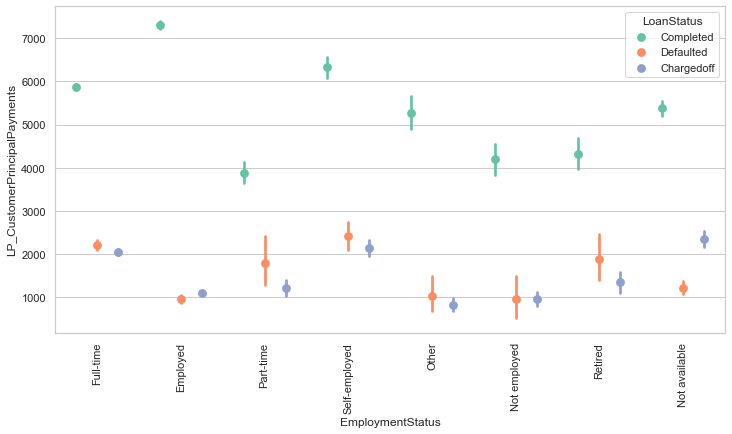

In [60]:
fig, ax = plt.subplots(nrows=1, figsize=(12,6))
sb.pointplot(data=df_prosper_loan_substitute[df_prosper_loan_substitute['CreditScoreAverage']>=400], x='EmploymentStatus', 
             y='LP_CustomerPrincipalPayments', hue='LoanStatus', palette='Set2', 
             dodge=0.5, join=False, ax=ax, order=request)
plt.xticks(rotation=90);

> The majority of people who later paid off their loans and had payments that had previously been charged off >= 4500 belong to the employed category.

### 3.5. Employment history, reference letters, and loan status

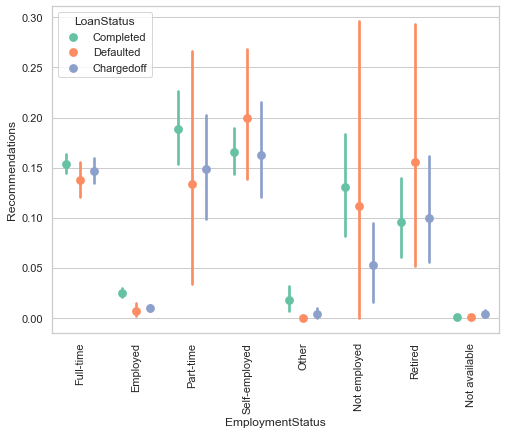

In [61]:
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
sb.pointplot(x='EmploymentStatus', y='Recommendations', data=df_prosper_loan_substitute, 
             hue='LoanStatus', ax=ax, join=False, dodge=0.5, order=request, palette='Set2')
plt.xticks(rotation=90);

> More recommendations are given to those with full-time jobs than to those in other categories, and they also repay their loans.

### 3.6. Status of the loan, listing category, and employment status

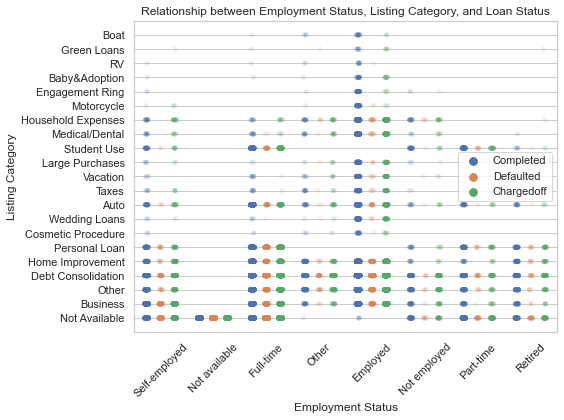

In [62]:
plt.figure(figsize=(8, 6))
sb.stripplot(data=df_prosper_loan_substitute, y='ListingCategory', x='EmploymentStatus', hue='LoanStatus',
jitter=True, dodge=0.7, alpha=0.125)
plt.xticks(rotation=45)
plt.legend(loc='center right')
#Add labels and title
plt.xlabel('Employment Status')
plt.ylabel('Listing Category')
plt.title('Relationship between Employment Status, Listing Category, and Loan Status')
plt.tight_layout()
plt.show()

> One intriguing discovery is the pattern observed among individuals who choose "not available" as their work status. It was found that these borrowers also frequently select "not available" as the justification for their loans. Surprisingly, they exhibit nearly equal odds of either completing their loans or defaulting on them.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> By taking into account the interactions of the other relevant factors, I looked at the relationship between employment status and loan status in more detail in this section.

### Were there any interesting or surprising interactions between features?

> Here, the only unexpected choice was Not Available for loan purposes in addition to the Not Available employment status.

## Conclusions


In this intriguing and challenging dataset, numerous inferred connections were discovered, despite the absence of explicit or readily observable characteristics pertaining to the key variable of interest.

During the investigative phase, I initially identified two potential predictors for my variable of interest: Employment Status and Verifiable Income Sources. However, after closely examining the distribution of Verifiable Income Sources in relation to my variable of interest, it became necessary to eliminate it from consideration.

From my extensive research, I was able to draw conclusive findings indicating that individuals meeting the following criteria exhibited a higher likelihood of loan repayment:

- Employment Status: Whether an individual is employed full-time, part-time, or falls under other employment categories.
- Purpose of Loan: The loan was obtained for personal, non-business-related purposes.
- Credit Score: A typical credit score ranging from 650 to 750.
- Recommendations: The presence of more than 10 recommendations.


These findings highlight the importance of formal employment, loan purpose, creditworthiness, and social recommendations in predicting the likelihood of loan repayment.
